# 东亚/中国

东亚区域 (`cedarkit.maps.domains.EastAsiaMapDomain`) 用于绘制中国范围图形，包括中国区域和南海子图两个图层。默认区域范围北纬 15 - 55，东经 70 - 140，使用简易圆柱投影 (`cartopy.crs.PlateCarree`)。

## 准备

导入需要的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.colors as mcolors
  
from cedarkit.maps.chart import Panel
from cedarkit.maps.domains import EastAsiaMapDomain
from cedarkit.maps.map import set_default_map_package
from cedarkit.maps.style import ContourStyle

设置使用 CEMC 地图包

In [2]:
set_default_map_package("cedarkit.maps.map.cemc")

'cedarkit.maps.map.cemc'

定义绘图样式

In [3]:
map_colors = np.array([
    (255, 255, 255),
    (0, 0, 0),
    (255, 255, 255),
    (0, 200, 200),
    (0, 210, 140),
    (0, 220, 0),
    (160, 230, 50),
    (230, 220, 50),
    (230, 175, 45),
    (240, 130, 40),
    (250, 60, 60),
    (240, 0, 130),
    (0, 0, 255),
    (255, 140, 0),
    (238, 18, 137)
], dtype=float) / 255
colormap = mcolors.ListedColormap(map_colors)
  
wind_speed_colormap = mcolors.ListedColormap(
    colormap(np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]))
)
wind_speed_contour_lev = np.array(
    [3.4, 5.5, 8, 10.8, 13.9, 17.2, 20.8, 24.5, 28.5]
)
wind_speed_style = ContourStyle(
    colors=wind_speed_colormap,
    levels=wind_speed_contour_lev,
    fill=True,
)

## 绘制

绘制底图布局

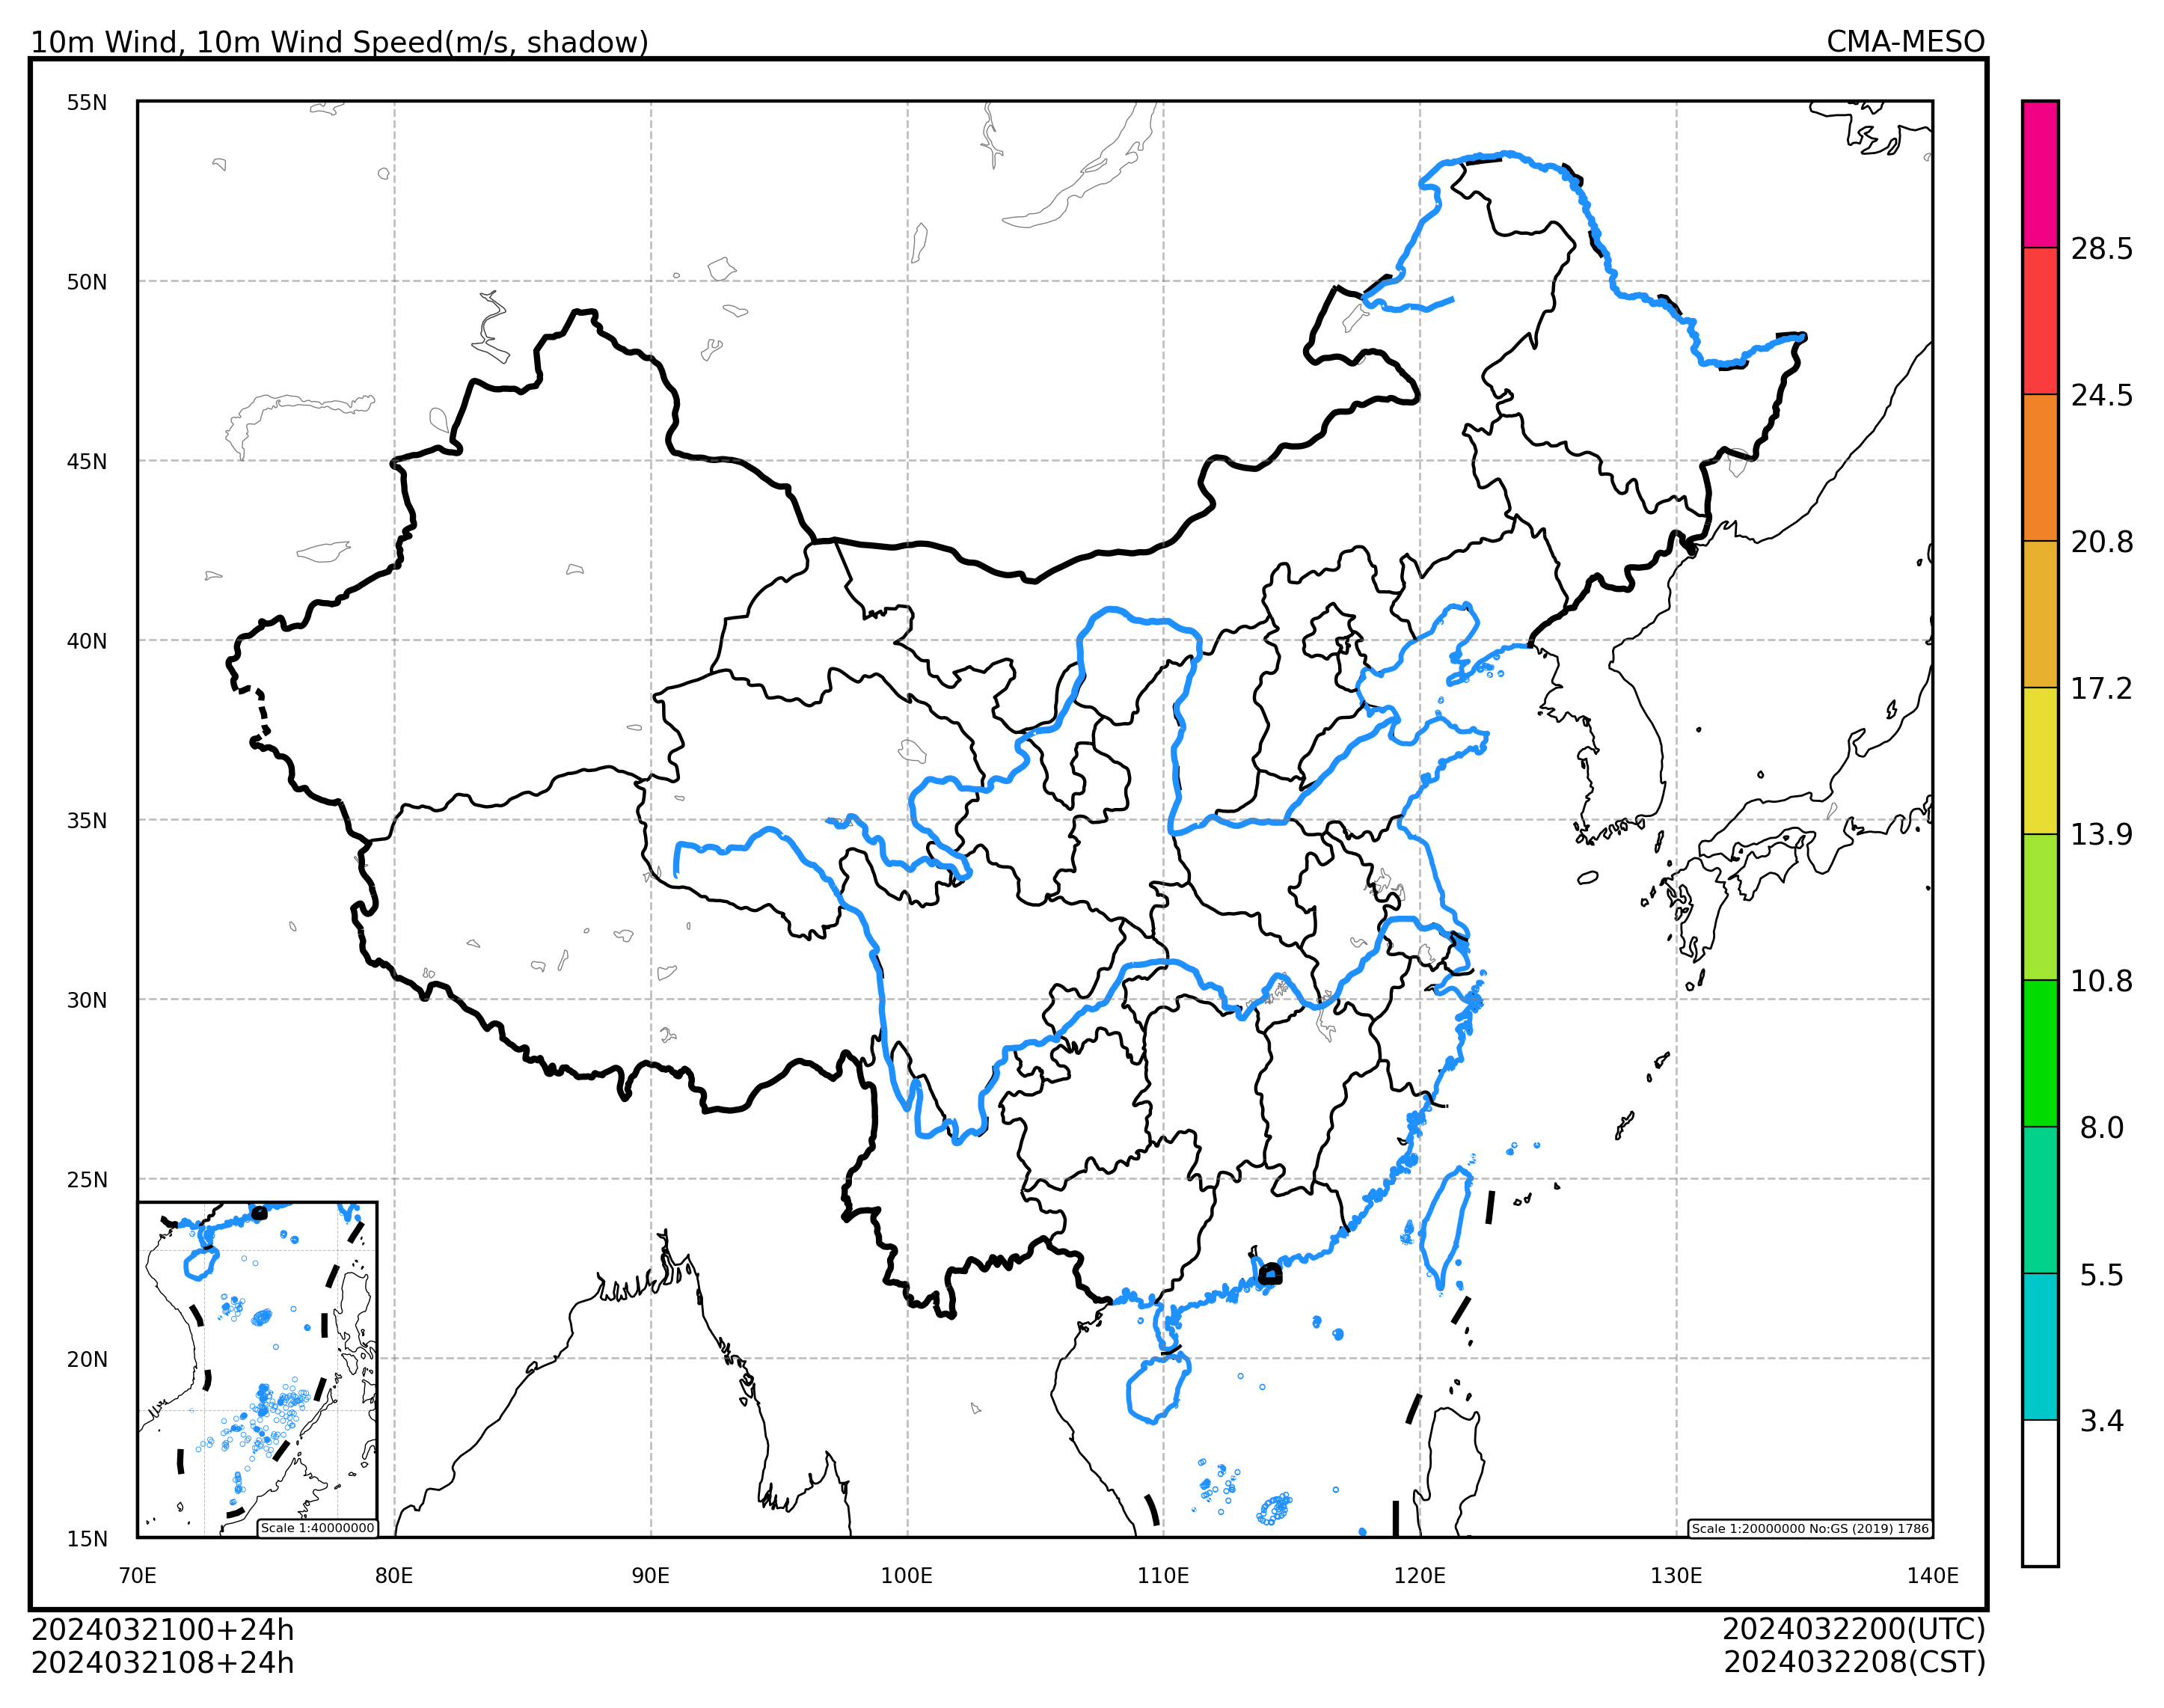

In [4]:
domain = EastAsiaMapDomain()
panel = Panel(domain=domain)
  
domain.set_title(
    panel=panel,
    graph_name="10m Wind, 10m Wind Speed(m/s, shadow)",
    system_name="CMA-MESO",
    start_time=pd.to_datetime("2024-03-21 00:00"),
    forecast_time=pd.to_timedelta("24h"),
)
domain.add_colorbar(panel=panel, style=wind_speed_style)

panel.show()